In [ ]:
# load data
from data.data_collection import load_credit_data
df =  load_credit_data()
original_df = df.copy()
df_eda = df.copy()
from data.data_preparation import *
# split columns into categorical and continuous
splitted_columns = split_columns(df)
categorical_columns = splitted_columns['categorical_columns']
continuous_columns = splitted_columns['continuous_columns']
# data cleaning
df = remove_nulls(df)
df = remove_duplicates(df)
'''print(f"Categorical Columns\n{categorical_columns}")
print('='*300)
print(f"Continuous Columns\n{continuous_columns}")'''
from model_selection.model_training import get_train_test_data
X_train,X_test,y_train,y_test=get_train_test_data(X=df.drop(columns="Y"), y=df.Y, stratify=True)
continuous_columns
continuous_columns.append("payment_consistency")
# We will split the data before feat eng

# then feature engineering
from feature_preparation.feature_selection import *

from feature_preparation.feature_engineering import get_scaler, scale_data,create_total_delays, \
create_payment_consistency

def perform_engineering(data):
    data_with_engineering=data.copy()
    data_with_engineering= create_payment_consistency(data_with_engineering)
    data_with_engineering= create_total_delays(data_with_engineering)
    return data_with_engineering

X_train_with_engineering = perform_engineering(X_train)


# get scaler
# We must append payment consistency to the continuous column
continuous_columns.append("payment_consistency")
scaler = get_scaler(train_data=X_train_with_engineering, columns=continuous_columns)
X_train_with_engineering = scale_data(X_train_with_engineering, continuous_columns, scaler)

# drop correlated features 
X_train_with_engineering= drop_correlated_features(X_train_with_engineering)

In [ ]:
from data.data_preparation import *
# split columns into categorical and continuous
splitted_columns = split_columns(df)
categorical_columns = splitted_columns['categorical_columns']
continuous_columns = splitted_columns['continuous_columns']
'''print(f"Categorical Columns\n{categorical_columns}")
print('='*300)
print(f"Continuous Columns\n{continuous_columns}")'''

Categorical Columns
['june_delay', 'gender', 'Y', 'education', 'july_delay', 'may_delay', 'april_delay', 'august_delay', 'marital_status', 'sept_delay']
Continuous Columns
['credit_amount', 'sept_bill', 'august_bill', 'july_bill', 'june_bill', 'may_bill', 'april_bill', 'sept_payment', 'august_payment', 'july_payment', 'june_payment', 'may_payment', 'april_payment', 'age']


In [ ]:
# data cleaning
df = remove_nulls(df)
df = remove_duplicates(df)

In [ ]:
df

,credit_amount,gender,education,marital_status,age,sept_delay,august_delay,july_delay,june_delay,may_delay,...,june_bill,may_bill,april_bill,sept_payment,august_payment,july_payment,june_payment,may_payment,april_payment,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
from model_selection.model_training import get_train_test_data
X_train,X_test,y_train,y_test=get_train_test_data(X=df.drop(columns="Y"), y=df.Y, stratify=True)

In [ ]:
continuous_columns
continuous_columns.append("payment_consistency")

In [ ]:
# We will split the data before feat eng

# then feature engineering
from feature_preparation.feature_selection import *

from feature_preparation.feature_engineering import get_scaler, scale_data,create_total_delays, \
create_payment_consistency

def perform_engineering(data):
    data_with_engineering=data.copy()
    data_with_engineering= create_payment_consistency(data_with_engineering)
    data_with_engineering= create_total_delays(data_with_engineering)
    return data_with_engineering

X_train_with_engineering = perform_engineering(X_train)


# get scaler
# We must append payment consistency to the continuous column
continuous_columns.append("payment_consistency")
scaler = get_scaler(train_data=X_train_with_engineering, columns=continuous_columns)
X_train_with_engineering = scale_data(X_train_with_engineering, continuous_columns, scaler)

# drop correlated features 
X_train_with_engineering= drop_correlated_features(X_train_with_engineering)

In [ ]:
X_train_with_engineering

,credit_amount,gender,education,marital_status,age,sept_delay,august_delay,july_delay,sept_bill,august_bill,july_bill,sept_payment,august_payment,july_payment,june_payment,may_payment,april_payment,payment_consistency,total_delays
3355,1.627653,2,2,1,1.349715,0,0,0,4.250262,4.573655,4.543440,0.575387,0.307912,0.378597,0.449329,0.389037,0.493483,-0.274274,0
28151,1.014662,2,1,2,-0.379368,0,0,0,1.611526,1.838360,2.188173,0.252055,0.542256,0.300221,0.004822,-0.310951,-0.134652,0.075266,0
8934,1.244533,1,2,1,-0.163232,-1,-1,-2,-0.678323,-0.686012,-0.670854,-0.335393,-0.238892,-0.284265,-0.305672,-0.311334,-0.294783,-0.377491,-10
13540,-0.517817,1,2,1,-0.811639,-1,-1,-2,-0.554540,-0.686012,-0.670854,-0.335393,-0.238892,-0.284265,-0.305672,-0.311334,-0.294783,-0.377491,-10
14378,-0.900937,1,3,2,-1.027774,2,0,0,-0.121567,-0.085283,-0.011717,-0.229652,-0.082662,-0.284265,-0.085463,-0.183993,-0.294783,-0.271016,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27754,-0.900937,2,1,2,-1.351977,1,2,0,-0.001702,0.010975,-0.023700,-0.335393,-0.154723,-0.231236,-0.211297,-0.311334,-0.109315,-0.296537,3
316,-0.441193,2,2,2,0.052903,0,0,0,-0.040051,0.003411,0.051426,-0.206154,-0.141248,-0.178207,-0.173547,-0.152158,-0.170913,-0.364393,0
4390,-1.207433,2,2,2,-1.568113,0,0,0,-0.572770,-0.548598,-0.548010,-0.229652,-0.188117,-0.241841,-0.305672,-0.190360,-0.294783,-0.324094,-4
10422,0.248422,2,1,2,-0.055165,0,-1,0,-0.503308,-0.135679,-0.028537,1.962939,0.346969,-0.198252,-0.175560,-0.247663,-0.180428,0.580714,-1


In [ ]:
from model_selection.model_training import *
6train_decision_tree(X_train_with_engineering,y_train,"dec_tree_with_feature_engineering")
train_knn(X_train_with_engineering,y_train,"knn_with_feature_engineering")
train_svm(X_train_with_engineering,y_train,"svm_with_feature_engineering")
train_xgb(X_train_with_engineering,y_train,"xgb_feature_engineering")
train_logistic_regression(X_train_with_engineering,y_train,"log_reg_with_feature_engineering")


dec_tree_with_feature_engineering complete and saved
knn_with_feature_engineering complete and saved
svm_with_feature_engineering complete and saved
xgb_feature_engineering complete and saved
log_reg_with_feature_engineering complete and saved


---

In [ ]:
from model_selection.evaluation_utils import  get_train_metrics, get_cv_metrics,get_positive_class_metric
import joblib

In [ ]:
from model_selection.evaluation_utils import  get_train_metrics, get_cv_metrics,get_positive_class_metric
import joblib
tree = joblib.load("../models/dec_tree_with_feature_engineering.joblib")
log_reg = joblib.load("../models/log_reg_with_feature_engineering.joblib")
svm = joblib.load("../models/svm_with_feature_engineering.joblib")
knn = joblib.load("../models/knn_with_feature_engineering.joblib")
xgb = joblib.load("../models/xgb_feature_engineering.joblib")

In [ ]:

get_train_metrics(tree, "Decision Tree",X_train_with_engineering, y_train )
get_train_metrics(log_reg, "log reg",X_train_with_engineering, y_train )
get_train_metrics(svm, "SVM",X_train_with_engineering, y_train )
get_train_metrics(knn, "KNN",X_train_with_engineering, y_train )
get_train_metrics(xgb, "XGB",X_train_with_engineering, y_train )


In [ ]:
from sklearn.model_selection import StratifiedKFold
random_state = 70
cv = StratifiedKFold(n_splits= 5,
                     shuffle= True, #splits
                     random_state= random_state)

get_cv_metrics(tree, "Decision Tree",X_train_with_engineering, y_train, cv= cv)
get_cv_metrics(log_reg, "log reg",X_train_with_engineering, y_train, cv= cv )
get_cv_metrics(svm, "SVM",X_train_with_engineering, y_train, cv= cv )
get_cv_metrics(knn, "KNN",X_train_with_engineering, y_train, cv= cv )
get_cv_metrics(xgb, "XGB",X_train_with_engineering, y_train, cv= cv )

=============== Decision Tree ==========
==================== Classification Report ====================
              precision    recall  f1-score   support

 Non-Default       0.83      0.81      0.82     16334
     Default       0.38      0.41      0.39      4641

    accuracy                           0.72     20975
   macro avg       0.60      0.61      0.61     20975
weighted avg       0.73      0.72      0.73     20975

Recall: 0.40789
Precision-Score: 0.38104
F1-Score: 0.39401
=============== log reg ==========
==================== Classification Report ====================
              precision    recall  f1-score   support

 Non-Default       0.82      0.97      0.89     16334
     Default       0.71      0.23      0.34      4641

    accuracy                           0.81     20975
   macro avg       0.76      0.60      0.62     20975
weighted avg       0.79      0.81      0.77     20975

Recall: 0.22775
Precision-Score: 0.70892
F1-Score: 0.34475
=============== SVM ====

In [ ]:
models = {
    "mode": 124
}

for model,value in models.items():
    print(model,value)

0 mode


In [1]:
# load data
from data.data_collection import load_credit_data
from feature_preparation.feature_selection import *
from data.data_preparation import *
from feature_preparation.feature_engineering import get_scaler, scale_data,create_total_delays, \
create_payment_consistency
from model_selection.evaluation_utils import  get_train_metrics, get_cv_metrics,get_positive_class_metric
from plotting.evaluation_plots import plot_positive_class_metric
import joblib
df =  load_credit_data()
original_df = df.copy()
df_eda = df.copy()

# split columns into categorical and continuous
splitted_columns = split_columns(df)
categorical_columns = splitted_columns['categorical_columns']
continuous_columns = splitted_columns['continuous_columns']
# data cleaning
df = remove_nulls(df)
df = remove_duplicates(df)
'''print(f"Categorical Columns\n{categorical_columns}")
print('='*300)
print(f"Continuous Columns\n{continuous_columns}")'''
from model_selection.model_training import get_train_test_data
X_train,X_test,y_train,y_test=get_train_test_data(X=df.drop(columns="Y"), y=df.Y, stratify=True)
continuous_columns
continuous_columns.append("payment_consistency")
# We will split the data before feat eng

# then feature engineering

def perform_engineering(data):
    data_with_engineering=data.copy()
    data_with_engineering= create_payment_consistency(data_with_engineering)
    data_with_engineering= create_total_delays(data_with_engineering)
    return data_with_engineering

X_train_with_engineering = perform_engineering(X_train)


# get scaler
# We must append payment consistency to the continuous column
continuous_columns.append("payment_consistency")
scaler = get_scaler(train_data=X_train_with_engineering, columns=continuous_columns)
X_train_with_engineering = scale_data(X_train_with_engineering, continuous_columns, scaler)

# drop correlated features 
X_train_with_engineering= drop_correlated_features(X_train_with_engineering)

In [2]:

tree = joblib.load("../models/dec_tree_with_feature_engineering.joblib")
log_reg = joblib.load("../models/log_reg_with_feature_engineering.joblib")
svm = joblib.load("../models/svm_with_feature_engineering.joblib")
knn = joblib.load("../models/knn_with_feature_engineering.joblib")
xgb = joblib.load("../models/xgb_feature_engineering.joblib")

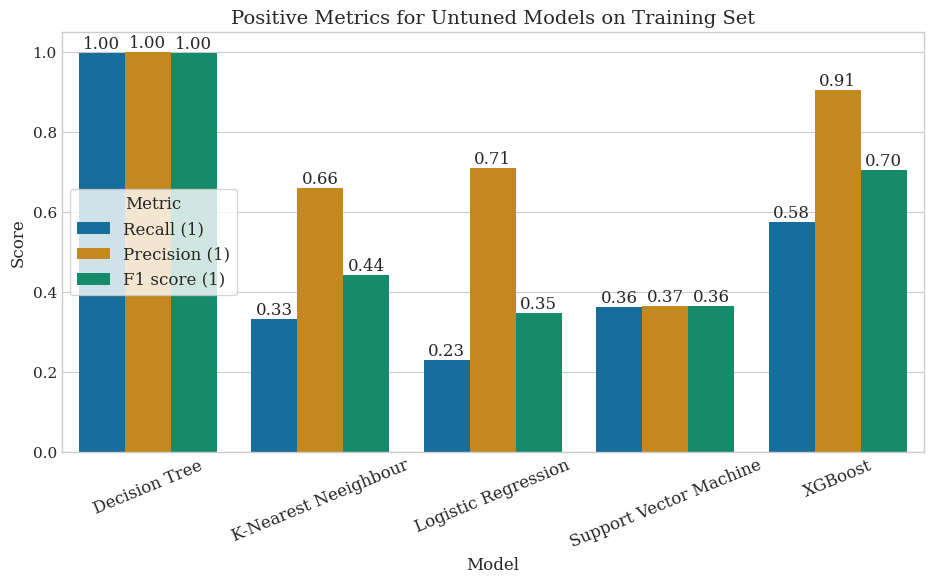

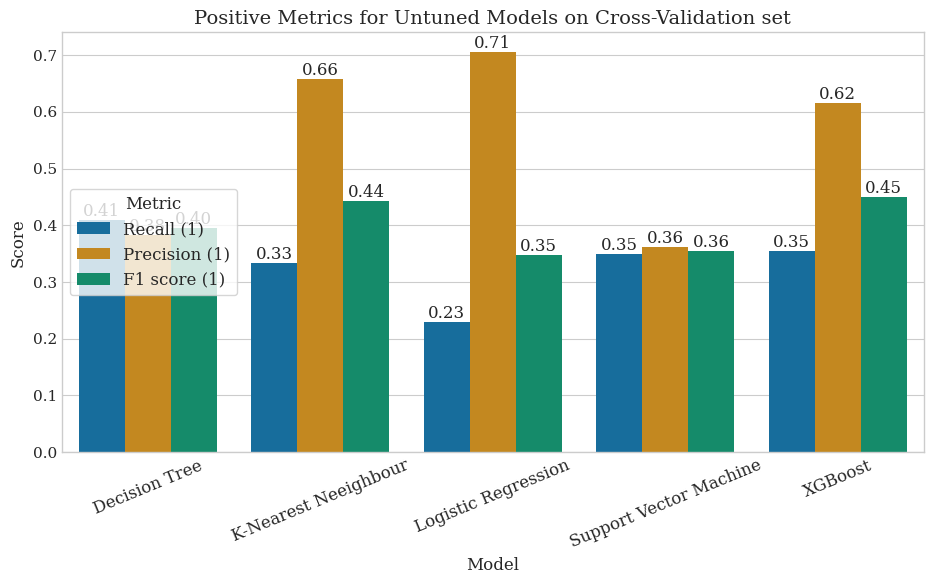

In [ ]:
models = {
    "Decision Tree": tree,
    "Logistic Regression":log_reg,
    "Support Vector Machine":svm,
    "K-Nearest Neighbour":knn,
    "XGBoost":xgb    
    }

plot_positive_class_metric(
    models=models,
    X_true=X_train_with_engineering,
    y_true=y_train,
    save= True,
    title= "Positive Metrics for Untuned Models on Training Set"
    )

plot_positive_class_metric(
    models=models,
    X_true=X_train_with_engineering,
    y_true=y_train,
    save= True,
    cross_val=True,
    title= "Positive Metrics for Untuned Models on Cross-Validation set"
    )